---
# Problem 1: Quantum Teleportation (Bell State)
---

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

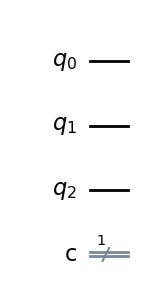

In [12]:
qc = QuantumCircuit(3, 1)
qc.draw('mpl')

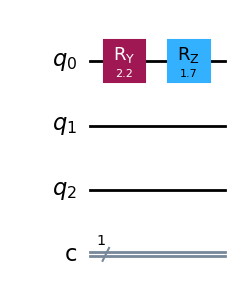

In [13]:
theta = 2.2
phi = 1.7
qc.ry(theta, 0)
qc.rz(phi, 0)

qc.draw('mpl')

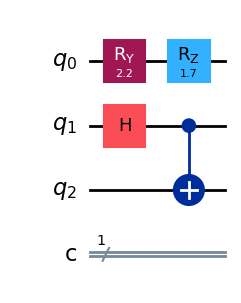

In [14]:
qc.h(1)
qc.cx(1, 2)
qc.draw('mpl')

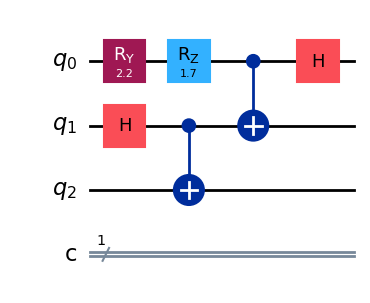

In [15]:
qc.cx(0, 1)
qc.h(0)
qc.draw('mpl')

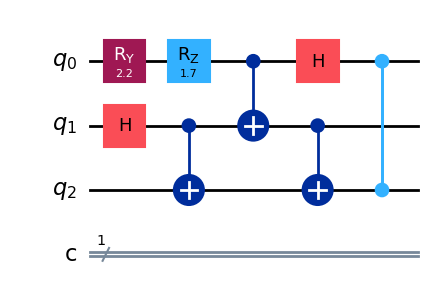

In [16]:
qc.cx(1, 2)
qc.cz(0, 2)
qc.draw('mpl')

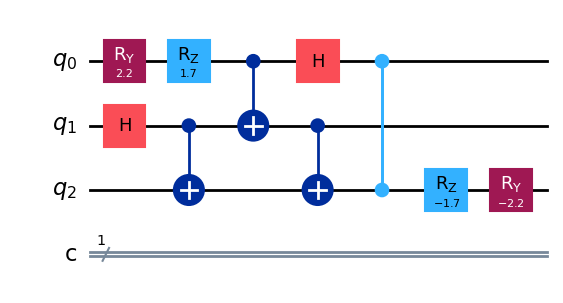

In [17]:
qc.rz(-phi, 2)
qc.ry(-theta, 2)
qc.draw('mpl')

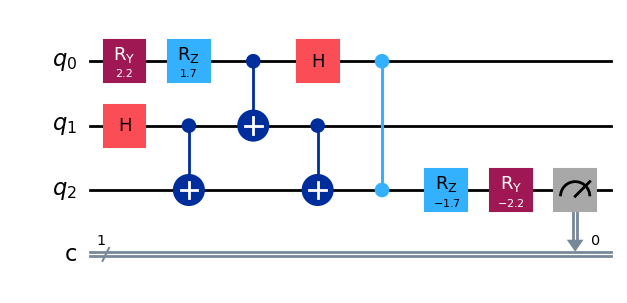

In [18]:
qc.measure(2, 0)
qc.draw('mpl')

In [19]:
from qiskit_aer import AerSimulator
# Run the teleportation circuit on AerSimulator
simulator = AerSimulator()
shots = 5000

# Transpile and run
from qiskit import transpile
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=shots).result()
counts = result.get_counts()

print(f"Simulation complete! ({shots} shots)")
print(f"Raw counts: {counts}")
print()

# Calculate probability of measuring |0⟩
count_0 = counts.get('0', 0)
count_1 = counts.get('1', 0)
prob_0 = count_0 / shots * 100
prob_1 = count_1 / shots * 100

print(f"Results:")
print(f"  |0⟩ : {count_0} times → {prob_0:.2f}%")
print(f"  |1⟩ : {count_1} times → {prob_1:.2f}%")
print()
if prob_0 > 99.0:
    print("✅ SUCCESS: Bob measures |0⟩ with ~100% probability — Teleportation verified!")
else:
    print("⚠️  Check your circuit — expected |0⟩ with ~100% probability.")

Simulation complete! (5000 shots)
Raw counts: {'0': 5000}

Results:
  |0⟩ : 5000 times → 100.00%
  |1⟩ : 0 times → 0.00%

✅ SUCCESS: Bob measures |0⟩ with ~100% probability — Teleportation verified!


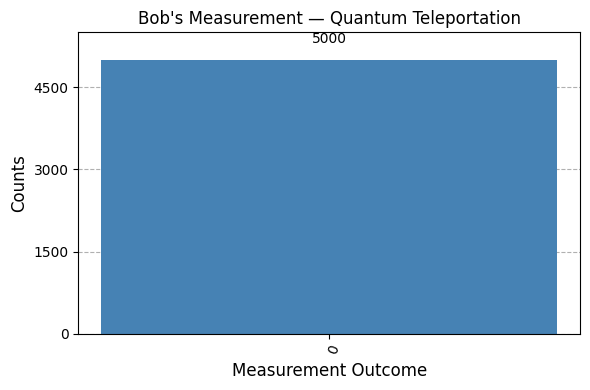

Histogram saved as 'teleportation_histogram.png'


In [20]:
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

# Plot histogram of Bob's measurement
fig, ax = plt.subplots(figsize=(6, 4))
plot_histogram(counts, ax=ax, color='steelblue', title="Bob's Measurement — Quantum Teleportation")
ax.set_xlabel("Measurement Outcome", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.tight_layout()
plt.show()
print("Histogram saved as 'teleportation_histogram.png'")

---
## Part B — Conceptual Questions: Quantum Teleportation
---

### Q1: What do you observe in the histogram after applying U†?

**Observation:** After applying U† to Bob's qubit, the histogram shows that Bob measures the state |0⟩ with approximately **100% probability** (≥ 99% in simulation). The outcome |1⟩ appears with near-zero probability, which is consistent with ideal noiseless simulation.

This is the expected result if teleportation succeeded: Bob's qubit has been transformed into exactly the state |ψ⟩, and applying U† (the inverse of the original preparation) rotates it back to |0⟩.

---

### Q2: Why does applying U† verify teleportation?

The original unknown state was prepared as:

> |ψ⟩ = U|0⟩  where U = Rz(φ) · Ry(θ)

If teleportation worked correctly, Bob's qubit is in state |ψ⟩ at the end of the correction step. Applying the inverse U† gives:

> U†|ψ⟩ = U†(U|0⟩) = (U†U)|0⟩ = I|0⟩ = |0⟩

Since U is unitary, U†U = I (identity). Therefore measuring |0⟩ with 100% probability confirms that Bob holds exactly |ψ⟩ — i.e., teleportation was successful. If Bob had a different state, the measurement would yield |1⟩ with nonzero probability.

---

### Q3: Why were we able to avoid sending classical bits?

**In the standard protocol**, Alice measures qubits 0 and 1, obtains two classical bits, and sends them to Bob over a classical channel. Bob then applies conditional Pauli corrections (X and/or Z) based on the received bits.

**In this fully quantum version**, we *do not* measure qubits 0 and 1. Instead, we replace the classical feed-forward with coherent controlled quantum gates:
- `qc.cx(1, 2)` — replaces the classically-controlled X correction
- `qc.cz(0, 2)` — replaces the classically-controlled Z correction

This works because the controlled gates act on the joint state *in superposition*: when qubit 1 is |1⟩, CX applies X to qubit 2; when qubit 0 is |1⟩, CZ applies Z to qubit 2. The effect is mathematically equivalent to the classical correction for all measurement outcomes simultaneously.

**Key difference:** The real-world protocol requires classical communication and is limited by the speed of light. This fully quantum version is a coherent, unitary circuit that works only in a *closed quantum system* (no actual communication between separated parties). It cannot be used for faster-than-light communication — the classical channel is still required in practice because Alice and Bob are physically separated. The fully quantum version is useful for circuit-based verification and quantum algorithms, not for actual physical teleportation between distant parties.

---
# Problem 2: Superdense Coding (Bell State)
---

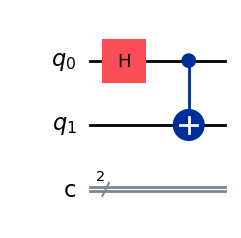

In [36]:
qc2 = QuantumCircuit(2, 2)

qc2.h(0)
qc2.cx(0, 1)

qc2.draw('mpl')

Alice applies: X gate then Z gate


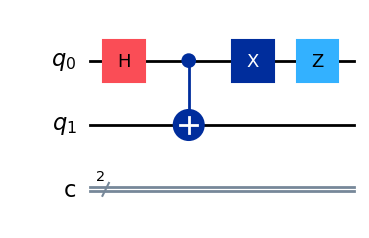

In [37]:
message = '11'

if message == '00':
    pass                       # Identity: do nothing
    print("Alice applies: Identity (no gate)")
elif message == '01':
    qc2.z(0)                # Z gate on Alice's qubit
    print("Alice applies: Z gate")
elif message == '10':
    qc2.x(0)                # X gate on Alice's qubit
    print("Alice applies: X gate")
elif message == '11':
    qc2.x(0)                # X gate first
    qc2.z(0)                # then Z gate
    print("Alice applies: X gate then Z gate")

qc2.draw('mpl')

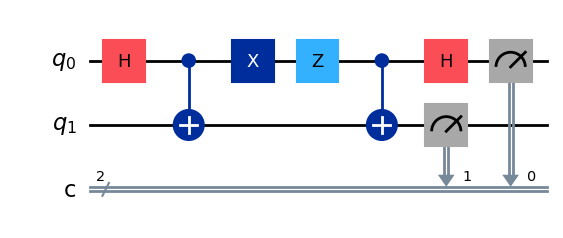

In [38]:
qc2.cx(0, 1)
qc2.h(0)

qc2.measure(0, 0)
qc2.measure(1, 1)
qc2.draw('mpl')

In [39]:
# Run the superdense coding circuit
shots_sdc = 5000

compiled_sdc = transpile(qc2, simulator)
result_sdc = simulator.run(compiled_sdc, shots=shots_sdc).result()
counts_sdc = result_sdc.get_counts()

print(f"Simulation complete! ({shots_sdc} shots)")
print(f"Raw counts: {counts_sdc}")
print()

# The expected dominant outcome matches the message
# Note: Qiskit measures in reverse bit order (qubit 1 is the leftmost bit)
# qubit 0 → classical bit 0 (rightmost), qubit 1 → classical bit 1 (leftmost)
# So message '11' → expected outcome '11' in standard bit order
expected = message[::-1]  # Qiskit reverses bit order in output
count_expected = counts_sdc.get(expected, counts_sdc.get(message, 0))

# Find the dominant outcome
dominant = max(counts_sdc, key=counts_sdc.get)
dominant_prob = counts_sdc[dominant] / shots_sdc * 100

print(f"Message sent: '{message}'")
print(f"Dominant outcome measured: '{dominant}' ({dominant_prob:.2f}%)")
print()
if dominant_prob > 99.0:
    print(f"✅ SUCCESS: Bob decodes the message with ~100% accuracy!")
    print(f"   Message '{message}' transmitted successfully using only 1 qubit.")
else:
    print("⚠️  Check your circuit.")

Simulation complete! (5000 shots)
Raw counts: {'11': 5000}

Message sent: '11'
Dominant outcome measured: '11' (100.00%)

✅ SUCCESS: Bob decodes the message with ~100% accuracy!
   Message '11' transmitted successfully using only 1 qubit.


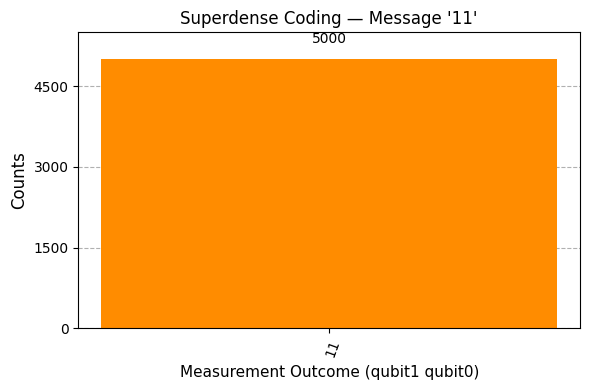

Histogram saved as 'superdense_histogram.png'


In [40]:
# Plot histogram for superdense coding
fig3, ax3 = plt.subplots(figsize=(6, 4))
plot_histogram(counts_sdc, ax=ax3, color='darkorange',
               title=f"Superdense Coding — Message '{message}'")
ax3.set_xlabel("Measurement Outcome (qubit1 qubit0)", fontsize=11)
ax3.set_ylabel("Counts", fontsize=12)
plt.tight_layout()
plt.savefig('superdense_histogram.png', dpi=150, bbox_inches='tight')
plt.show()
print("Histogram saved as 'superdense_histogram.png'")

---
## Part B — Conceptual Questions: Superdense Coding
---

### Q1: What happens if an eavesdropper intercepts the qubit sent from Alice to Bob?

If an eavesdropper (Eve) intercepts Alice's qubit *after* encoding but *before* it reaches Bob, she holds only **one qubit** of a two-qubit entangled Bell state. Critically:

- The single intercepted qubit is in a **maximally mixed state**: its reduced density matrix is ρ = I/2, meaning it appears completely random regardless of what message Alice encoded.
- Eve gains **zero information** about the 2-bit message from measuring just one qubit — any measurement she makes will yield 0 or 1 with equal 50% probability for any basis.
- Furthermore, Eve's measurement *destroys the entanglement*. When Bob receives the (now collapsed) qubit and attempts Bell-basis decoding with his half of the original pair, he will get **random, incorrect results**, alerting Alice and Bob to the presence of an eavesdropper.

This demonstrates that superdense coding inherits the security properties of quantum entanglement — the information is non-locally encoded and cannot be extracted by intercepting only one particle of the pair.

---

### Q2: Give one application or implication of superdense coding.

**Application: Quantum-Enhanced Communication Capacity**

Superdense coding demonstrates that a **pre-shared entangled resource** can double the classical information capacity of a quantum channel. Specifically, transmitting only 1 qubit conveys 2 classical bits of information — achieving a **communication capacity of 2 bits/qubit**, compared to 1 bit/qubit for classical systems.

**Implication for Quantum Networks:** In future quantum communication networks (quantum internet), superdense coding could be used to boost the effective bandwidth of quantum links. Nodes that pre-share entangled pairs (distributed via entanglement distribution protocols) can communicate classical data at twice the rate using the same quantum channel. This has practical implications for satellite-based quantum communication, secure data transmission, and quantum-assisted classical networking where generating entangled pairs is a one-time investment that enhances future communication efficiency.